In [21]:
# I will use the pandas library to load the Parquet file.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#loading the parquest dataset
df_yellowcab_jan2023 = pd.read_parquet('C:/Users/dell/Documents/Portfolio/New york Yellow cabs Jan 2023/yellow_tripdata_2023-01.parquet')

#C:\Users\dell\Documents\Portfolio\New york Yellow cabs Jan 2023

In [23]:
df_yellowcab_jan2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [24]:
#Inspecting the data types of each column and ensuring they match the expected types.

df_yellowcab_jan2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [28]:
df_yellowcab_jan2023.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [29]:
# Displays percentage of sum  0f missing values per column
df_yellowcab_jan2023.isnull().sum() * 100/ len(df_yellowcab_jan2023)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          2.33937
trip_distance            0.00000
RatecodeID               2.33937
store_and_fwd_flag       2.33937
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     2.33937
airport_fee              2.33937
dtype: float64

In [35]:
# Get value counts for store_and_fwd_flag
df_yellowcab_jan2023['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    2975020
Y      20003
Name: count, dtype: int64

#### Handling Missing values

I dont want to drop the rows becasue i dont want to remove from number of recorded trips so i will replace the missing values with fillna

In [37]:
# Assuming the missing values in RatecodeID should be filled with the most common value
most_common_ratecode = df_yellowcab_jan2023['RatecodeID'].mode().iloc[0]
df_yellowcab_jan2023['RatecodeID'].fillna(most_common_ratecode, inplace=True)

# Assuming the missing values in passenger_count should be filled with the mean value
df_yellowcab_jan2023['passenger_count'].fillna(df_yellowcab_jan2023['passenger_count'].mean(), inplace=True)

# Sinc the missing values in store_and_fwd_flag should be filled with the most common value ('N')
df_yellowcab_jan2023['store_and_fwd_flag'].fillna('N', inplace=True)

# Assuming the missing values in congestion_surcharge should be filled with the median value
df_yellowcab_jan2023['congestion_surcharge'].fillna(df_yellowcab_jan2023['congestion_surcharge'].median(), inplace=True)

# Assuming the missing values in airport_fee should be filled with 0
df_yellowcab_jan2023['airport_fee'].fillna(0, inplace=True)


In [38]:
# Re-checking of missing values
df_yellowcab_jan2023.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

#### passenger_count datatype is float64, since we can't have a half or quarter passenger, we will convert it to int64.
#### RatecodeID datatype is float64   since its an ID and IDs do have decimal

In [39]:
# Convert RatecodeID to int64
df_yellowcab_jan2023['RatecodeID'] = df_yellowcab_jan2023['RatecodeID'].astype('int64')

# Convert passenger_count to int64
df_yellowcab_jan2023['passenger_count'] = df_yellowcab_jan2023['passenger_count'].astype('int64')

In [40]:
df_yellowcab_jan2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

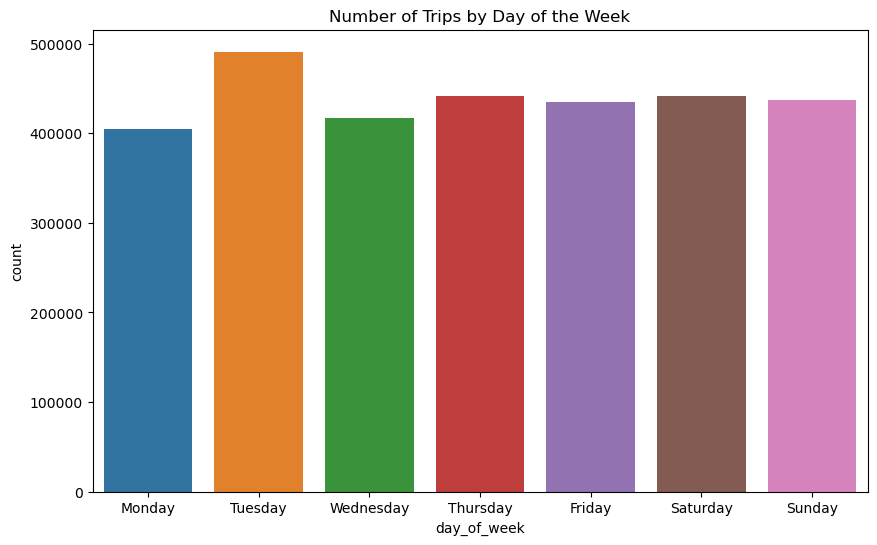

In [43]:
import seaborn as sns

# Extract day of the week and hour of the day
df_yellowcab_jan2023['day_of_week'] = df_yellowcab_jan2023['tpep_pickup_datetime'].dt.day_name()
df_yellowcab_jan2023['hour_of_day'] = df_yellowcab_jan2023['tpep_pickup_datetime'].dt.hour

# Plot number of trips by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df_yellowcab_jan2023, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.show()

In [44]:
# Exporting the cleaned dataset to a CSV file
df_yellowcab_jan2023.to_csv('cleaned_yellow_tripdata_2023-01.csv', index=False)